In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt  #for data visualization
import warnings            
warnings.filterwarnings("ignore") 

In [2]:
!pip install statsmodels 

In [3]:
import statsmodels.api as sm
from scipy import stats

In [4]:
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
!pip install sklearn
import sklearn

In [5]:

import seaborn as sns
import chart_studio.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [8]:
pip install "notebook>=5.3" "ipywidgets>=7.5"

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


Data Preparation

In [10]:
#load data from csv file
data_panel2021=pd.read_csv('DataPanelWHR2021C2.csv')
data_2021=pd.read_csv('DataForFigure2.1WHR2021C2.csv')

In [11]:
#columns name change
data_panel2021.rename(columns={'Country name':'Country'}, inplace = True)
data_2021.rename(columns={'Country name':'Country'}, inplace = True)
data_2021.rename(columns={'Regional indicator':'Region'}, inplace = True)

In [12]:
data_panel2021.head()

,Country,Region,year,Life_Ladder_Score,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,Afghanistan,South Asia,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,Afghanistan,South Asia,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,Afghanistan,South Asia,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,Afghanistan,South Asia,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,Afghanistan,South Asia,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776


In [13]:
data_panel2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2098 non-null   object 
 1   Region                        2098 non-null   object 
 2   year                          2098 non-null   int64  
 3   Life_Ladder_Score             2098 non-null   float64
 4   Log_GDP_per_capita            2062 non-null   float64
 5   Social_support                2085 non-null   float64
 6   Healthy_life_expectancy       2043 non-null   float64
 7   Freedom_to_make_life_choices  2066 non-null   float64
 8   Generosity                    2009 non-null   float64
 9   Perceptions_of_corruption     1988 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 164.0+ KB


In [14]:
data_2021.head()

,Country,Region,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [15]:
data_panel2021[data_panel2021['Country'].isin(["China"])]

,Country,Region,year,Life_Ladder_Score,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
367,China,East Asia,2006,4.560,8.696,0.747,66.880,NaN,NaN,NaN
368,China,East Asia,2007,4.863,8.824,0.811,67.060,NaN,-0.176,NaN
369,China,East Asia,2008,4.846,8.911,0.748,67.240,0.853,-0.092,NaN
370,China,East Asia,2009,4.454,8.996,0.798,67.420,0.771,-0.160,NaN
371,China,East Asia,2010,4.653,9.092,0.768,67.600,0.805,-0.133,NaN
372,China,East Asia,2011,5.037,9.179,0.787,67.760,0.824,-0.186,NaN
373,China,East Asia,2012,5.095,9.249,0.788,67.920,0.808,-0.185,NaN
374,China,East Asia,2013,5.241,9.319,0.778,68.080,0.805,-0.158,NaN
375,China,East Asia,2014,5.196,9.386,0.820,68.240,NaN,-0.217,NaN
376,China,East Asia,2015,5.304,9.449,0.794,68.400,NaN,-0.244,NaN


In [16]:
#fill null value with mean of countries in the same Region in the same year
data_panel2021["Generosity"] = data_panel2021.groupby(["Region","year"])["Generosity"]\
.transform(lambda x: x.fillna(x.mean()))   
data_panel2021["Log_GDP_per_capita"] = data_panel2021.groupby(["Region","year"])["Log_GDP_per_capita"]\
.transform(lambda x: x.fillna(x.mean())) 
data_panel2021["Social_support"] = data_panel2021.groupby(["Region","year"])["Social_support"]\
.transform(lambda x: x.fillna(x.mean())) 
data_panel2021["Healthy_life_expectancy"] = data_panel2021.groupby(["Region","year"])["Healthy_life_expectancy"]\
.transform(lambda x: x.fillna(x.mean())) 
data_panel2021["Freedom_to_make_life_choices"] = data_panel2021.groupby(["Region","year"])["Freedom_to_make_life_choices"]\
.transform(lambda x: x.fillna(x.mean())) 
data_panel2021["Perceptions_of_corruption"] = data_panel2021.groupby(["Region","year"])["Perceptions_of_corruption"]\
.transform(lambda x: x.fillna(x.mean())) 

In [17]:
data_panel2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2098 non-null   object 
 1   Region                        2098 non-null   object 
 2   year                          2098 non-null   int64  
 3   Life_Ladder_Score             2098 non-null   float64
 4   Log_GDP_per_capita            2098 non-null   float64
 5   Social_support                2098 non-null   float64
 6   Healthy_life_expectancy       2098 non-null   float64
 7   Freedom_to_make_life_choices  2098 non-null   float64
 8   Generosity                    2073 non-null   float64
 9   Perceptions_of_corruption     2098 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 164.0+ KB


In [18]:
data_panel2021[data_panel2021.isnull().T.any()]

,Country,Region,year,Life_Ladder_Score,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
158,Belgium,Western Europe,2005,7.262,10.745,0.935,69.9,0.9240,NaN,0.598000
234,Brazil,Latin America and Caribbean,2005,6.637,9.438,0.883,63.3,0.8820,NaN,0.745000
469,Czech Republic,Central and Eastern Europe,2005,6.439,10.324,0.919,67.0,0.8650,NaN,0.901000
482,Denmark,Western Europe,2005,8.019,10.851,0.972,69.6,0.9710,NaN,0.237000
534,Egypt,Middle East and North Africa,2005,5.168,9.036,0.848,59.7,0.8170,NaN,0.726600
605,France,Western Europe,2005,7.093,10.642,0.940,71.3,0.8950,NaN,0.688000
651,Germany,Western Europe,2005,6.620,10.689,0.963,70.2,0.8470,NaN,0.781000
683,Greece,Western Europe,2005,6.006,10.462,0.837,70.5,0.7340,NaN,0.861000
763,Hungary,Central and Eastern Europe,2005,5.194,10.108,0.930,64.6,0.6970,NaN,0.903000
818,Iran,Middle East and North Africa,2005,5.308,9.393,0.766,62.0,0.6510,NaN,0.636000


In [19]:
data_panel2021["Generosity"].fillna(method='bfill', inplace=True)

In [20]:
data_panel2021[data_panel2021['Country'].isin(["Belgium"])]

,Country,Region,year,Life_Ladder_Score,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
158,Belgium,Western Europe,2005,7.262,10.745,0.935,69.900,0.924,0.069,0.598
159,Belgium,Western Europe,2007,7.219,10.792,0.922,70.260,0.901,0.069,0.721
160,Belgium,Western Europe,2008,7.117,10.789,0.923,70.440,0.887,0.007,0.652
161,Belgium,Western Europe,2010,6.854,10.779,0.931,70.800,0.807,0.022,0.697
162,Belgium,Western Europe,2011,7.111,10.783,0.937,70.920,0.880,-0.014,0.711
163,Belgium,Western Europe,2012,6.935,10.784,0.927,71.040,0.855,-0.050,0.758
164,Belgium,Western Europe,2013,7.104,10.784,0.909,71.160,0.891,0.017,0.574
165,Belgium,Western Europe,2014,6.855,10.795,0.944,71.280,0.861,0.001,0.512
166,Belgium,Western Europe,2015,6.904,10.810,0.885,71.400,0.869,0.062,0.469
167,Belgium,Western Europe,2016,6.949,10.819,0.929,71.600,0.866,-0.056,0.497


In [21]:
data_panel2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2098 non-null   object 
 1   Region                        2098 non-null   object 
 2   year                          2098 non-null   int64  
 3   Life_Ladder_Score             2098 non-null   float64
 4   Log_GDP_per_capita            2098 non-null   float64
 5   Social_support                2098 non-null   float64
 6   Healthy_life_expectancy       2098 non-null   float64
 7   Freedom_to_make_life_choices  2098 non-null   float64
 8   Generosity                    2098 non-null   float64
 9   Perceptions_of_corruption     2098 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 164.0+ KB


In [22]:
data_panel2021b=data_panel2021.drop(columns=["Country","Region","year"])

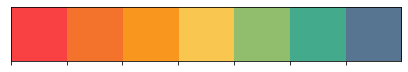

In [23]:
#Colors to be used in the plots
color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]
sns.palplot(color)

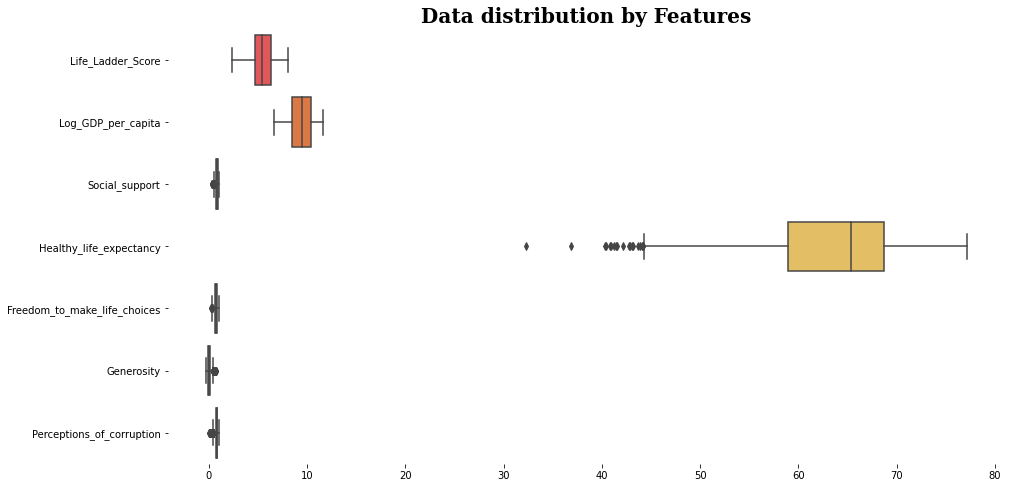

In [24]:

fig=plt.figure(figsize=(15,8))
plt.title("Data distribution by Features",family='Serif', weight='bold', size=20)
sns.boxplot(data=data_panel2021b,orient="h", palette=color)

for s in ['left','right','top','bottom']:
    plt.gca().spines[s].set_visible(False)

In [25]:
data_panel2021b.max()

Life_Ladder_Score                8.019
Log_GDP_per_capita              11.648
Social_support                   0.987
Healthy_life_expectancy         77.100
Freedom_to_make_life_choices     0.985
Generosity                       0.698
Perceptions_of_corruption        0.983
dtype: float64

Predict Model

In [26]:
# Standard ML Models for comparision
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from scipy import stats



# Splitting data into training/testing
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [27]:
features_to_normalize = ["Life_Ladder_Score","Generosity","Log_GDP_per_capita","Social_support","Healthy_life_expectancy","Freedom_to_make_life_choices", "Perceptions_of_corruption"]

data_panel2021[features_to_normalize] = data_panel2021[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [28]:
data_panel2021

,Country,Region,year,Life_Ladder_Score,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,Afghanistan,South Asia,2008,0.239015,0.146619,0.230990,0.412946,0.632737,0.486931,0.893460
1,Afghanistan,South Asia,2009,0.359142,0.180531,0.375897,0.421875,0.579092,0.508228,0.859705
2,Afghanistan,South Asia,2010,0.422218,0.201875,0.357245,0.430804,0.470426,0.441433,0.708861
3,Afghanistan,South Asia,2011,0.258150,0.196489,0.331420,0.437946,0.327373,0.481123,0.734177
4,Afghanistan,South Asia,2012,0.249468,0.213445,0.331420,0.445089,0.375516,0.552759,0.781646
...,...,...,...,...,...,...,...,...,...,...
2093,Zimbabwe,Sub-Saharan Africa,2017,0.223777,0.275484,0.665710,0.506696,0.680880,0.229429,0.755274
2094,Zimbabwe,Sub-Saharan Africa,2018,0.219880,0.282067,0.695839,0.520089,0.694635,0.258470,0.853376
2095,Zimbabwe,Sub-Saharan Africa,2019,0.056520,0.262318,0.672884,0.533482,0.514443,0.262343,0.839662
2096,Zimbabwe,Sub-Saharan Africa,2020,0.139086,0.238181,0.612626,0.546875,0.529574,0.315586,0.795359


In [29]:
data_panel2021a=data_panel2021.drop(columns=["Country","Region","year"])

In [30]:
data_panel2021a.corr()

,Life_Ladder_Score,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
Life_Ladder_Score,1.000000,0.780699,0.708682,0.741766,0.524834,0.181332,-0.418448
Log_GDP_per_capita,0.780699,1.000000,0.686665,0.843523,0.354864,-0.011561,-0.324624
Social_support,0.708682,0.686665,1.000000,0.616526,0.409473,0.060565,-0.217382
Healthy_life_expectancy,0.741766,0.843523,0.616526,1.000000,0.385493,0.020164,-0.315950
Freedom_to_make_life_choices,0.524834,0.354864,0.409473,0.385493,1.000000,0.317071,-0.471785
Generosity,0.181332,-0.011561,0.060565,0.020164,0.317071,1.000000,-0.279533
Perceptions_of_corruption,-0.418448,-0.324624,-0.217382,-0.315950,-0.471785,-0.279533,1.000000


In [31]:
from string import ascii_letters

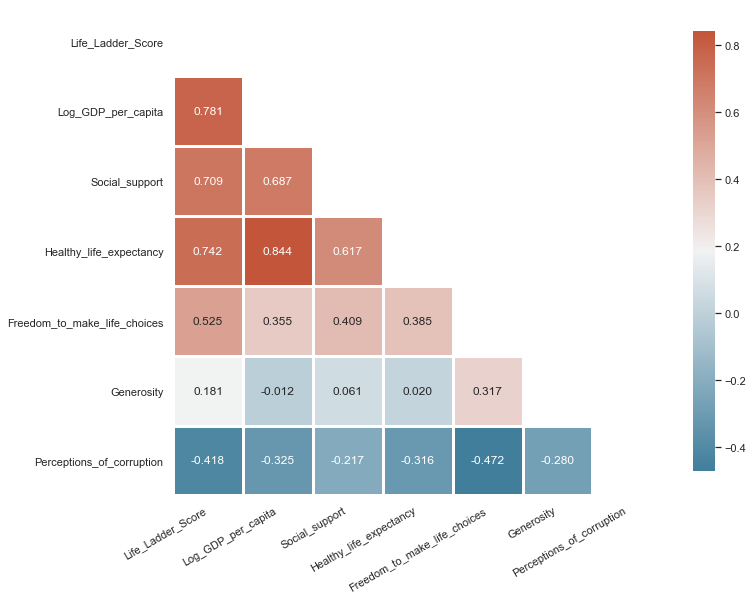

In [32]:
sns.set_theme(style="white")


# Compute the correlation matrix
corr = data_panel2021a.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax=sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,  fmt= '.3f',ax=ax,
            square=True, linewidths=2.5, cbar_kws={"shrink": 0.9})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
);

In [33]:
#Xdata_panel2021a
df_X = data_panel2021a.drop(columns=["Life_Ladder_Score"])
df_Y = data_panel2021a[["Life_Ladder_Score"]]

Divide Training set ans Testing set by random split

In [97]:
# 75% is for training and 25% is for testing
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, 
                                                    test_size = 0.25,
                                                    random_state=123)

In [112]:
# 75% is for training and 25% is for testing
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, 
                                                    test_size = 0.25,
                                                   random_state=1)

In [116]:
# 75% is for training and 25% is for testing
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, 
                                                    test_size = 0.25,
                                                   random_state=2)

In [120]:
# 75% is for training and 25% is for testing
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, 
                                                    test_size = 0.25,
                                                   random_state=3)

In [124]:
# 75% is for training and 25% is for testing
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, 
                                                    test_size = 0.25,
                                                   random_state=4)

In [125]:
lr0 = LinearRegression()
lr0.fit(X_train, Y_train)

LinearRegression()

In [126]:
print('w0:',lr0.intercept_)
print('w1,w2,w3,w4,w5,w6:',lr0.coef_)

w0: [-0.06918023]
w1,w2,w3,w4,w5,w6: [[ 0.33902993  0.2924252   0.19051145  0.1593369   0.11274194 -0.08095925]]


Test MAE: 0.07904954634141285
Test MSE: 0.010341349564091632
Test R2: 0.7419565526714338


Text(0.5, 1.0, 'LinearRegression')

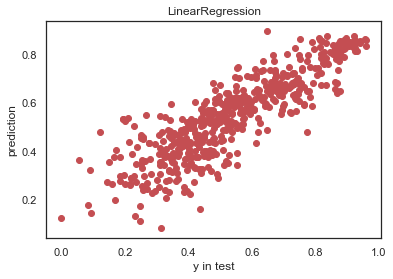

In [127]:
lr0_pred = lr0.predict(X_test)
from sklearn import metrics
print('Test MAE:',metrics.mean_absolute_error(Y_test, lr0_pred))
print('Test MSE:',metrics.mean_squared_error(Y_test, lr0_pred))
print("Test R2:",metrics.r2_score(Y_test,lr0_pred))
plt.scatter(Y_test,lr0_pred,color='r')
plt.xlabel('y in test')
plt.ylabel('prediction')
plt.title('LinearRegression')

In [101]:
# first artificially add intercept to X, as advised in the docs:

X2 = sm.add_constant(X_train)
est = sm.OLS(Y_train, X2)
est2 =est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      Life_Ladder_Score   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     776.6
Date:                Sat, 01 May 2021   Prob (F-statistic):               0.00
Time:                        15:39:47   Log-Likelihood:                 1408.4
No. Observations:                1573   AIC:                            -2803.
Df Residuals:                    1566   BIC:                            -2765.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [167]:
# 75% is for training and 25% is for testing
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, 
                                                    test_size = 0.25,
                                                   random_state=1)

In [161]:
#Random Forest
rfg0 = RandomForestRegressor()
rfg0.fit(X_train,Y_train)
rfg0_pred = rfg0.predict(X_test)
print('Test MAE:',metrics.mean_absolute_error(Y_test, rfg0_pred))
print('Test MSE:',metrics.mean_squared_error(Y_test, rfg0_pred))
print("Test R2:",metrics.r2_score(Y_test,rfg0_pred))

Test MAE: 0.057647548175896866
Test MSE: 0.005586501721427514
Test R2: 0.8606023175437694


Text(0.5, 1.0, 'RandomForestRegressor')

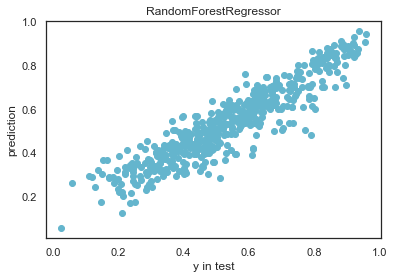

In [103]:
plt.scatter(Y_test,rfg0_pred, color='c')
plt.xlabel('y in test')
plt.ylabel('prediction')
plt.title('RandomForestRegressor')

Text(0.5, 0, 'Random Forest Feature Importance')

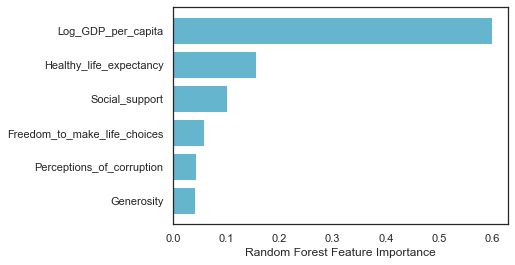

In [176]:
rfg0.feature_importances_
sorted_idx = rfg0.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rfg0.feature_importances_[sorted_idx],color="c")
plt.xlabel("Random Forest Feature Importance")

Test MAE: 0.08202254395734197
Test MSE: 0.01334699947793963
Test R2: 0.6520307745619187


Text(0.5, 1.0, 'DecisionTreeRegressor')

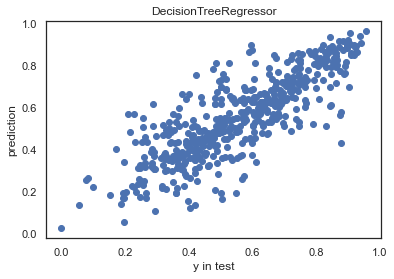

In [168]:
#Decision Tree
dtr0 = DecisionTreeRegressor()
dtr0.fit(X_train,Y_train)
dtr0_pred = dtr0.predict(X_test)
print('Test MAE:',metrics.mean_absolute_error(Y_test, dtr0_pred))
print('Test MSE:',metrics.mean_squared_error(Y_test, dtr0_pred))
print("Test R2:",metrics.r2_score(Y_test,dtr0_pred))
plt.scatter(Y_test,dtr0_pred)
plt.xlabel('y in test')
plt.ylabel('prediction')
plt.title('DecisionTreeRegressor')

In [79]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV



In [149]:
# 75% is for training and 25% is for testing
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, 
                                                    test_size = 0.25,
                                                   random_state=123)

In [150]:
#SVR Model
svr0 = SVR(kernel='rbf', C=1.5,gamma=0.1,epsilon=0.05)
svr0.fit(X_train, Y_train)

SVR(C=1.5, epsilon=0.05, gamma=0.1)

In [151]:
svr0.intercept_

array([0.35213053])

In [152]:
svr0_pred = svr0.predict(X_test)
print('Test MAE:',metrics.mean_absolute_error(Y_test, svr0_pred))
print('Test MSE:',metrics.mean_squared_error(Y_test, svr0_pred))
print("Test R2:",r2_score(Y_test, svr0_pred))


Test MAE: 0.0786319996507246
Test MSE: 0.01044381639027491
Test R2: 0.7310026620558869


Text(0.5, 1.0, 'SVR')

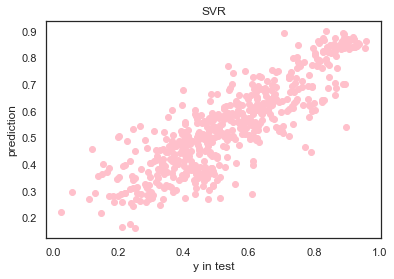

In [153]:
plt.scatter(Y_test,svr0_pred, color="pink")
plt.xlabel('y in test')
plt.ylabel('prediction')
plt.title('SVR')

Divide Training set ans Testing set by years

In [55]:
df_test=data_panel2021[(data_panel2021['year']> 2017)  ]

In [56]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 10 to 2097
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       530 non-null    object 
 1   Region                        530 non-null    object 
 2   year                          530 non-null    int64  
 3   Life_Ladder_Score             530 non-null    float64
 4   Log_GDP_per_capita            530 non-null    float64
 5   Social_support                530 non-null    float64
 6   Healthy_life_expectancy       530 non-null    float64
 7   Freedom_to_make_life_choices  530 non-null    float64
 8   Generosity                    530 non-null    float64
 9   Perceptions_of_corruption     530 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 45.5+ KB


In [57]:
df_train = data_panel2021[(data_panel2021.year != 2018) & (data_panel2021.year != 2019) & (data_panel2021.year != 2020)& (data_panel2021.year != 2020)& (data_panel2021.year != 2021)]

In [58]:
df_train

,Country,Region,year,Life_Ladder_Score,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,Afghanistan,South Asia,2008,0.239015,0.146619,0.230990,0.412946,0.632737,0.486931,0.893460
1,Afghanistan,South Asia,2009,0.359142,0.180531,0.375897,0.421875,0.579092,0.508228,0.859705
2,Afghanistan,South Asia,2010,0.422218,0.201875,0.357245,0.430804,0.470426,0.441433,0.708861
3,Afghanistan,South Asia,2011,0.258150,0.196489,0.331420,0.437946,0.327373,0.481123,0.734177
4,Afghanistan,South Asia,2012,0.249468,0.213445,0.331420,0.445089,0.375516,0.552759,0.781646
...,...,...,...,...,...,...,...,...,...,...
2089,Zimbabwe,Sub-Saharan Africa,2013,0.410170,0.269300,0.730273,0.416518,0.437414,0.223621,0.839662
2090,Zimbabwe,Sub-Saharan Africa,2014,0.320517,0.270497,0.682927,0.448214,0.528198,0.252662,0.828059
2091,Zimbabwe,Sub-Saharan Africa,2015,0.235294,0.270696,0.639885,0.479911,0.562586,0.205227,0.817511
2092,Zimbabwe,Sub-Saharan Africa,2016,0.240964,0.269100,0.685796,0.493304,0.653370,0.232333,0.726793


In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568 entries, 0 to 2093
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       1568 non-null   object 
 1   Region                        1568 non-null   object 
 2   year                          1568 non-null   int64  
 3   Life_Ladder_Score             1568 non-null   float64
 4   Log_GDP_per_capita            1568 non-null   float64
 5   Social_support                1568 non-null   float64
 6   Healthy_life_expectancy       1568 non-null   float64
 7   Freedom_to_make_life_choices  1568 non-null   float64
 8   Generosity                    1568 non-null   float64
 9   Perceptions_of_corruption     1568 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 134.8+ KB


In [61]:
Xtrain = df_train.drop(columns=["Country","Region","year","Life_Ladder_Score"])
Ytrain = df_train[["Life_Ladder_Score"]]

In [62]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568 entries, 0 to 2093
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Log_GDP_per_capita            1568 non-null   float64
 1   Social_support                1568 non-null   float64
 2   Healthy_life_expectancy       1568 non-null   float64
 3   Freedom_to_make_life_choices  1568 non-null   float64
 4   Generosity                    1568 non-null   float64
 5   Perceptions_of_corruption     1568 non-null   float64
dtypes: float64(6)
memory usage: 85.8 KB


In [63]:
Ytrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568 entries, 0 to 2093
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Life_Ladder_Score  1568 non-null   float64
dtypes: float64(1)
memory usage: 24.5 KB


In [64]:
Xtest = df_test.drop(columns=["Country","Region","year","Life_Ladder_Score"])
Ytest = df_test[["Life_Ladder_Score"]]

In [65]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 10 to 2097
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Log_GDP_per_capita            530 non-null    float64
 1   Social_support                530 non-null    float64
 2   Healthy_life_expectancy       530 non-null    float64
 3   Freedom_to_make_life_choices  530 non-null    float64
 4   Generosity                    530 non-null    float64
 5   Perceptions_of_corruption     530 non-null    float64
dtypes: float64(6)
memory usage: 29.0 KB


In [66]:
Ytest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 10 to 2097
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Life_Ladder_Score  530 non-null    float64
dtypes: float64(1)
memory usage: 8.3 KB


In [67]:
lr = LinearRegression()
lr.fit(Xtrain, Ytrain)

LinearRegression()

In [68]:
lr_predtrain = lr.predict(Xtrain)
from sklearn import metrics
mae_train = np.mean(abs(lr_predtrain - Ytrain))
rmse_train = np.sqrt(np.mean((lr_predtrain - Ytrain) ** 2))
print('Using Linear Regression, MAE_train is %0.2f' %  mae_train)  
print('Using Linear Regression, RMSE_train is %0.2f' %  rmse_train) 
print("Train R2:",metrics.r2_score(Ytrain,lr_predtrain))

Using Linear Regression, MAE_train is 0.08
Using Linear Regression, RMSE_train is 0.10
Train R2: 0.7410019511936646


In [69]:
X1 = sm.add_constant(Xtrain)
est1 = sm.OLS(Ytrain, X1)
est3 = est1.fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:      Life_Ladder_Score   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     744.3
Date:                Sat, 01 May 2021   Prob (F-statistic):               0.00
Time:                        14:40:50   Log-Likelihood:                 1366.6
No. Observations:                1568   AIC:                            -2719.
Df Residuals:                    1561   BIC:                            -2682.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [70]:
lr_pred = lr.predict(Xtest)
from sklearn import metrics
print('Test MAE:',metrics.mean_absolute_error(Ytest, lr_pred))
print('Test MSE:',metrics.mean_squared_error(Ytest, lr_pred))
print("Test R2:",metrics.r2_score(Ytest,lr_pred))

Test MAE: 0.07728162592769393
Test MSE: 0.010012164778211718
Test R2: 0.7232039804738788


Text(0.5, 1.0, 'LinearRegression')

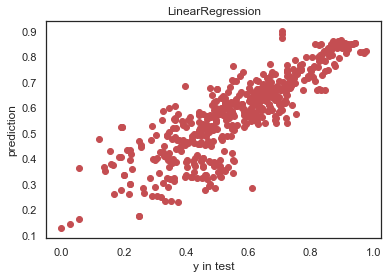

In [71]:
plt.scatter(Ytest,lr_pred,color='r')
plt.xlabel('y in test')
plt.ylabel('prediction')
plt.title('LinearRegression')

In [72]:
print('w0:',lr.intercept_)
print('w1,w2,w3,w4,w5,w6:',lr.coef_)

w0: [-0.06787601]
w1,w2,w3,w4,w5,w6: [[ 0.32979439  0.29145527  0.21630359  0.13604524  0.12952117 -0.08518486]]


Test MAE: 0.06832452228447641
Test MSE: 0.007882627172849498
Test R2: 0.7820771158699517


Text(0.5, 1.0, 'RandomForestRegressor')

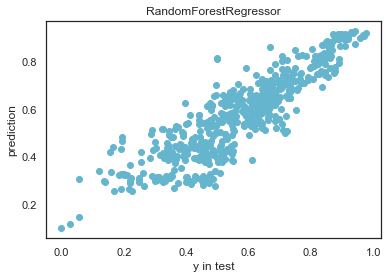

In [76]:
#Random Forest
rfg = RandomForestRegressor()
rfg.fit(Xtrain,Ytrain)
rfg_pred = rfg.predict(Xtest)
print('Test MAE:',metrics.mean_absolute_error(Ytest, rfg_pred))
print('Test MSE:',metrics.mean_squared_error(Ytest, rfg_pred))
print("Test R2:",metrics.r2_score(Ytest,rfg_pred))
plt.xlabel('y in test')
plt.ylabel('prediction')
plt.title('RandomForestRegressor')
plt.scatter(Ytest,rfg_pred, color='c')
plt.xlabel('y in test')
plt.ylabel('prediction')
plt.title('RandomForestRegressor')

Test MAE: 0.09066599360817296
Test MSE: 0.014121619063796706
Test R2: 0.6095941254753026


Text(0.5, 1.0, 'DecisionTreeRegressor')

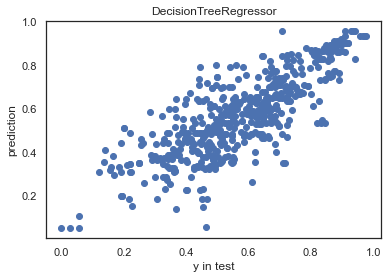

In [77]:
#Decision Tree
dtr = DecisionTreeRegressor()
dtr.fit(Xtrain,Ytrain)
dtr_pred = dtr.predict(Xtest)
print('Test MAE:',metrics.mean_absolute_error(Ytest, dtr_pred))
print('Test MSE:',metrics.mean_squared_error(Ytest, dtr_pred))
print("Test R2:",metrics.r2_score(Ytest,dtr_pred))
plt.scatter(Ytest,dtr_pred)
plt.xlabel('y in test')
plt.ylabel('prediction')
plt.title('DecisionTreeRegressor')

In [93]:
gsc = GridSearchCV(svr,
        param_grid={'kernel': ['linear', 'rbf'],
            'C': [0.1, 1,1.25,1.5, 5, 10],
            'epsilon': [ 0.01, 0.05, 0.1, 0.5, 1,5],
                   'gamma': [0.001, 0.005, 0.1, 1, 3, 5]},
        cv=5, scoring='r2', verbose=0, n_jobs=-1)

In [84]:
gsc = GridSearchCV(svr,
        param_grid={'kernel': ['linear', 'rbf'],
            'C': [0.1, 1,1.25],
            'epsilon': [  0.05, 0.1, 0.5, 1],
                   'gamma': [0.001, 0.005, 0.1, 1]},
        cv=5, scoring='r2', verbose=0, n_jobs=-1)

In [378]:
gsc = GridSearchCV(
        estimator=SVR(kernel='linear'),
        param_grid={
            'C': [0.1, 1,1.25,1.5,10,100],
            'epsilon': [ 0.1]
        },
        cv=5, scoring='r2', verbose=0, n_jobs=-1)

In [94]:
grid_result = gsc.fit(Xtrain, Ytrain)
best_params = grid_result.best_params_
best_params

{'C': 1.5, 'epsilon': 0.05, 'gamma': 0.1, 'kernel': 'rbf'}

In [95]:
best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"],gamma=best_params['gamma'])

In [96]:
best_svr.fit(Xtrain, Ytrain)
best_svr_pred = best_svr.predict(Xtest)
print('Test MAE:',metrics.mean_absolute_error(Ytest, best_svr_pred))
print('Test MSE:',metrics.mean_squared_error(Ytest, best_svr_pred))
print("Test R2:",r2_score(Ytest, best_svr_pred))

Test MAE: 0.07251604573766324
Test MSE: 0.00910343283980142
Test R2: 0.7483267575096313


In [80]:
## SVR Model
svr = SVR(kernel='linear', C=1.25)
svr.fit(Xtrain, Ytrain)
svr_pred = svr.predict(Xtest)
print('Test MAE:',metrics.mean_absolute_error(Ytest, svr_pred))
print('Test MSE:',metrics.mean_squared_error(Ytest, svr_pred))
print("Test R2:",r2_score(Ytest, svr_pred))

Test MAE: 0.07791537094519008
Test MSE: 0.010101293274329874
Test R2: 0.7207399366333755


Text(0.5, 1.0, 'SVR')

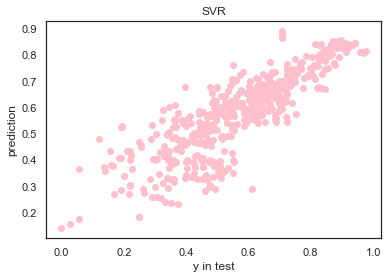

In [81]:
plt.scatter(Ytest,svr_pred, color="pink")
plt.xlabel('y in test')
plt.ylabel('prediction')
plt.title('SVR')

Text(0, 0.5, 'r2_score')

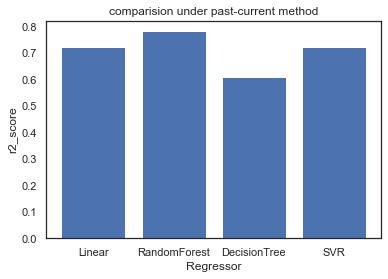

In [82]:
y = np.array([r2_score(Ytest,lr_pred),r2_score(Ytest,rfg_pred),r2_score(Ytest,dtr_pred),r2_score(Ytest,svr_pred)])
x = ['Linear','RandomForest','DecisionTree',"SVR"]

plt.bar(x,y)
plt.title('comparision under past-current method')
plt.xlabel('Regressor')
plt.ylabel('r2_score')

In [83]:
y = np.array([r2_score(Y_test,lr0_pred),r2_score(Y_test,rfg0_pred),r2_score(Y_test,dtr0_pred),r2_score(Y_test,svr0_pred)])
x = ['Linear','RandomForest','DecisionTree',"SVR"]

plt.bar(x,y)
plt.title('comparision under random seed')
plt.xlabel('Regressor')
plt.ylabel('r2_score')

NameError: name 'rfg0_pred' is not defined